### Import Library

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### Import Dataset

In [33]:
data = pd.read_csv('input/wine-clustering.csv')

### Mencetak 5 Data Pertama dari Dataset

In [34]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Mencetak Informasi dan Deskripsi dari Dataset

In [35]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Scaling Data

In [36]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

### Plot Data sebelum dilakukan Klasifikasi

Sumbu y menandakan kandungan Malic Acid atau Asam Malat, sedangkan sumbu X menandakan kandungan Proline pada Wine

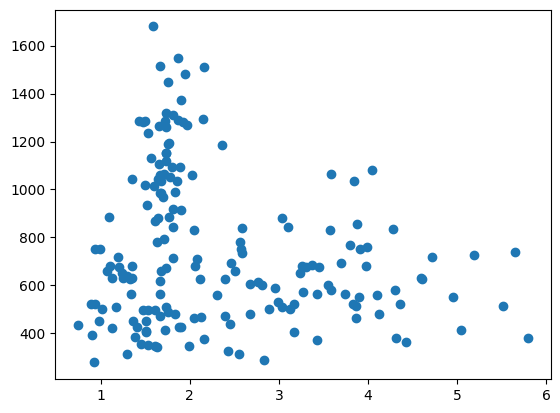

In [37]:
x_axis = data.loc[:, ['Malic_Acid']]
y_axis = data.loc[:, ['Proline']]

plt.scatter(x_axis, y_axis)

### Membuat Dendogram dari Dataset

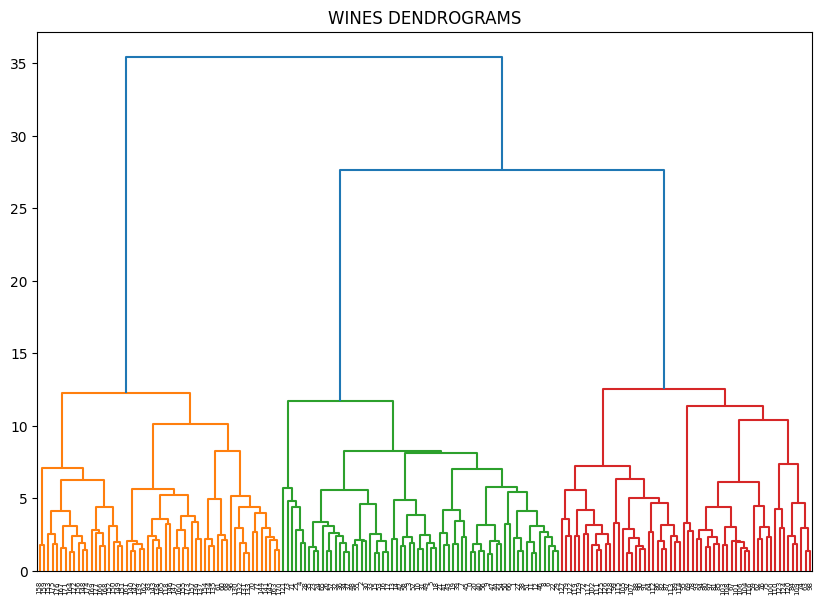

In [38]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("WINES DENDROGRAMS")
dendogram = shc.dendrogram(shc.linkage(scaledData, method='ward'))

### Membuat Model Hierarchical Clustering (Average Method)

In [39]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
types = cluster.fit_predict(scaledData)
types

c:\Users\kekop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 0, 0, 7, 2, 3, 1,
       1, 7, 0, 6, 0, 5, 3, 5, 2, 7, 7, 0, 6, 3, 7, 7, 3, 0, 2, 7, 3, 3,
       3, 3, 3, 3, 3, 7, 7, 6, 0, 7, 2, 3, 7, 7, 3, 7, 7, 3, 7, 3, 7, 2,
       2, 3, 3, 3, 3, 3, 7, 3, 0, 3, 2, 5, 3, 2, 2, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4,
       4, 4], dtype=int64)

### Membuat Model Hierarchical Clustering (Ward Method)

In [40]:
hc_ward = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
wardMethod = hc_ward.fit_predict(scaledData)
print(wardMethod)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


c:\Users\kekop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Membuat Model Hierarchical Clustering (Single Linkage Method)

In [41]:
singleMethod = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
singleMethod = singleMethod.fit_predict(scaledData)
print(singleMethod)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\Users\kekop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Membuat Model Hierarchical Clustering (Complete Linkage Method)

In [42]:
completeMethod = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
completeMethod = completeMethod.fit_predict(scaledData)
print(completeMethod)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1
 1 0 0 0 0 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 0 2 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


c:\Users\kekop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(scaledData)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

### Clustering Dataset and Plotting into Graph

c:\Users\kekop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


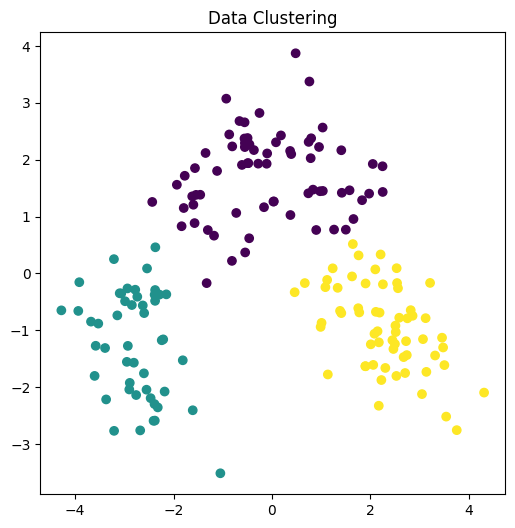

In [44]:
clustered = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = clustered.fit_predict(X_principal))
plt.title('Data Clustering')
plt.show()

Referensi : https://www.kaggle.com/code/rafaymemon/agglomerative-hierarchical-clustering-wines-guided/notebook